In [2]:
import json
import networkx as nx

# Load JSON data from file
with open('data.json', 'r') as file:
    data = json.load(file)

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph from the JSON data
for item in data:
    G.add_edge(item['From'], item['To'])

print("Nodes in the graph:")
print(G.nodes())
print("\nEdges in the graph:")
print(G.edges())

Nodes in the graph:
['CNF-SAT', 'k-OV', 'OV', 'Diameter 2 vs 3', 'Edit Distance', 'Frechet Distance', 'UOV', 'Dynamic Time Warping', 'Longest Common Subsequence', 'Partial Match', '3SUM', "3SUM'", 'GeomBase', '3 Points on Line', 'Point on 3 Lines', 'Separator1', 'Separator2', 'Strips Cover Box', 'Triangles Cover Triangle', 'Hole in Union', 'Triangle Measure', 'Point Covering', 'Visibility Between Segments', 'Visibility From Infinity', 'Visible Triangle', 'Planar Motion Planning', '3D Motion Planning', 'Static Dihedral Rotation Queries', 'Local Alignment', "Longest Common Substring with don't cares", 'Multiple Local Alignment', 'Directed, Weighted APSP', 'Negative Triangle Detection', 'CFG Parsing', 'Combinatorial BMM', 'Matrix Product Verification', 'Matrix Product', 'Negative Triangle Search', 'Negative Triangle Listing', 'Maximum Subarray', 'Distance Product', 'Minimum Witness Finding', 'All Pairs Minimum Witness (APMW)', 'Undirected, Weighted APSP', 'Metricity', 'Shortest Cycle', 'M

In [3]:
# Find SCCs in the graph
sccs = list(nx.strongly_connected_components(G))

scc_dag = nx.DiGraph()


for i, scc in enumerate(sccs):
    scc_dag.add_node(i, members=scc)


for i, scc_i in enumerate(sccs):
    for j, scc_j in enumerate(sccs):
        if i != j:  
            for node_i in scc_i:
                for node_j in scc_j:
                    if G.has_edge(node_i, node_j):
                        scc_dag.add_edge(i, j)
                        break  



In [4]:
# Find source nodes in the SCC DAG
source_nodes = [node for node, degree in scc_dag.in_degree() if degree == 0]


for source_node in source_nodes:
    print(f"Source SCC {source_node}: Members -> {scc_dag.nodes[source_node]['members']}")

Source SCC 20: Members -> {'CNF-SAT'}
Source SCC 30: Members -> {'OV', 'Partial Match'}
Source SCC 33: Members -> {'UOV'}
Source SCC 46: Members -> {'All-Integers 3SUM', '3SUM', "3SUM'", 'GeomBase'}
Source SCC 78: Members -> {'Combinatorial BMM', 'CFG Parsing', 'Combinatorial Triangle Detection'}
Source SCC 79: Members -> {'Matrix Product'}
Source SCC 80: Members -> {'Negative Triangle Search'}
Source SCC 81: Members -> {'Negative Triangle Listing'}
Source SCC 82: Members -> {'Minimum Witness Finding'}
Source SCC 83: Members -> {'All Pairs Minimum Witness (APMW)'}
Source SCC 84: Members -> {'Minimum Weight Triangle'}
Source SCC 86: Members -> {'Nondecreasing Triangle'}
Source SCC 87: Members -> {'$(\\min, \\leq)$ Product'}
Source SCC 88: Members -> {'Directed Radius'}
Source SCC 89: Members -> {'Undirected Radius'}
Source SCC 90: Members -> {'Directed Median'}
Source SCC 91: Members -> {'Undirected Median'}
Source SCC 96: Members -> {'Triangle Detection'}
Source SCC 100: Members -> {'M

In [19]:

def find_longest_path_in_dag(dag):
    topo_sort = list(nx.topological_sort(dag))
    
    longest_path_length = {node: 0 for node in dag.nodes()}
    predecessor = {node: None for node in dag.nodes()}
    
    for node in topo_sort:
        for successor in dag.successors(node):
            if longest_path_length[successor] < longest_path_length[node] + 1:
                longest_path_length[successor] = longest_path_length[node] + 1
                predecessor[successor] = node
    
    end_node = max(longest_path_length, key=longest_path_length.get)
    
    node = end_node
    longest_path = []
    while node is not None:
        longest_path.append(node)
        node = predecessor[node]
    longest_path.reverse() 
    
    return longest_path_length[end_node], longest_path


longest_path_length, longest_path = find_longest_path_in_dag(scc_dag)
print(f"Length of the longest path: {longest_path_length}")
print(f"Longest path in the SCC DAG: {longest_path}")
# print names
for i in longest_path:
    print(f"{scc_dag.nodes[i]['members']} -> ")



Length of the longest path: 4
Longest path in the SCC DAG: [111, 110, 67, 50, 49]
{'k-Clique'} -> 
{'Max-Weight k-Clique'} -> 
{'Metricity', 'Maximum Subarray', 'Directed, Weighted APSP', 'Negative Triangle Detection', 'Betweenness Centrality (BC)', 'Undirected, Weighted APSP'} -> 
{'Distance Product'} -> 
{'Second Shortest Simple Path'} -> 


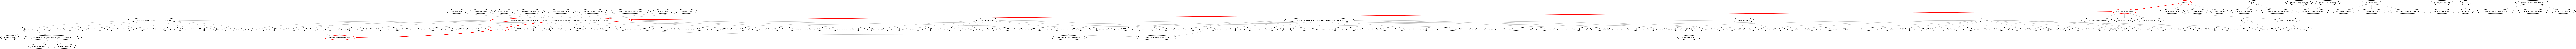

In [26]:
import pygraphviz as pgv
from IPython.display import Image

def plot_scc_dag_with_longest_path(dag, longest_path):
    A = pgv.AGraph(strict=True, directed=True)
    
    # Add all nodes and edges to the graph
    for node in dag.nodes():
        if node in longest_path:
            A.add_node(node, color='red', label=f"{scc_dag.nodes[node]['members']}")
        else:
            A.add_node(node, color='black', label=f"{scc_dag.nodes[node]['members']}")
    for u, v in dag.edges():
        A.add_edge(u, v, color='gray')
    
    # Highlight the longest path
    for i in range(len(longest_path) - 1):
        if A.has_edge(longest_path[i], longest_path[i+1]):
            e = A.get_edge(longest_path[i], longest_path[i+1])
            e.attr.update(color='red', penwidth=2)
    
    # Layout and render the graph
    A.layout(prog='dot')
    filename = "./scc_dag_longest_path.png"
    A.draw(filename)
    
    return Image(filename)

# Plot and display the graph
image = plot_scc_dag_with_longest_path(scc_dag, longest_path)
display(image)


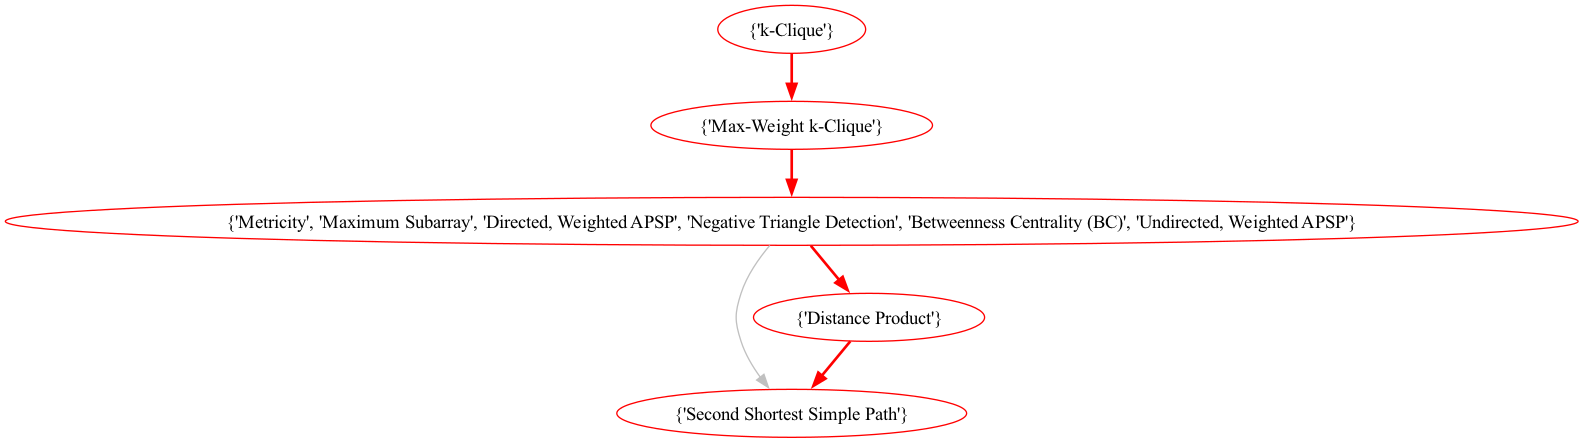

In [31]:
import pygraphviz as pgv
from IPython.display import Image

def plot_scc_dag_with_longest_path(dag, longest_path):
    A = pgv.AGraph(strict=True, directed=True)
    
    # Add all nodes and edges to the graph
    for node in dag.nodes():
        if node in longest_path:
            A.add_node(node, color='red', label=f"{scc_dag.nodes[node]['members']}")

    for u, v in dag.edges():
        if u in longest_path and v in longest_path:
            A.add_edge(u, v, color='gray')

    # Highlight the longest path
    for i in range(len(longest_path) - 1):
        if A.has_edge(longest_path[i], longest_path[i+1]):
            e = A.get_edge(longest_path[i], longest_path[i+1])
            e.attr.update(color='red', penwidth=2)
    
    # Layout and render the graph
    A.layout(prog='dot')
    filename = "./scc_dag_longest_path_only.png"
    A.draw(filename)
    
    return Image(filename)

# Plot and display the graph
image = plot_scc_dag_with_longest_path(scc_dag, longest_path)
display(image)


In [6]:
max_reduction = 0
best_edge = None
original_scc_count = len(list(nx.strongly_connected_components(G)))
print(f"Original number of SCCs: {original_scc_count}")

for node_i in G.nodes():
    for node_j in G.nodes():
        if node_i != node_j and not G.has_edge(node_i, node_j):
            # Temporarily add the edge
            G.add_edge(node_i, node_j)
            new_scc_count = len(list(nx.strongly_connected_components(G)))
            
            if original_scc_count - new_scc_count > max_reduction:
                max_reduction = original_scc_count - new_scc_count
                best_edge = (node_i, node_j)
            
            G.remove_edge(node_i, node_j)

print(f"Adding edge {best_edge} reduces the number of SCCs by {max_reduction}")
print(f"Updated number of SCCs: {original_scc_count - max_reduction}")

Original number of SCCs: 118
Adding edge ('Second Shortest Simple Path', 'k-Clique') reduces the number of SCCs by 4
Updated number of SCCs: 114


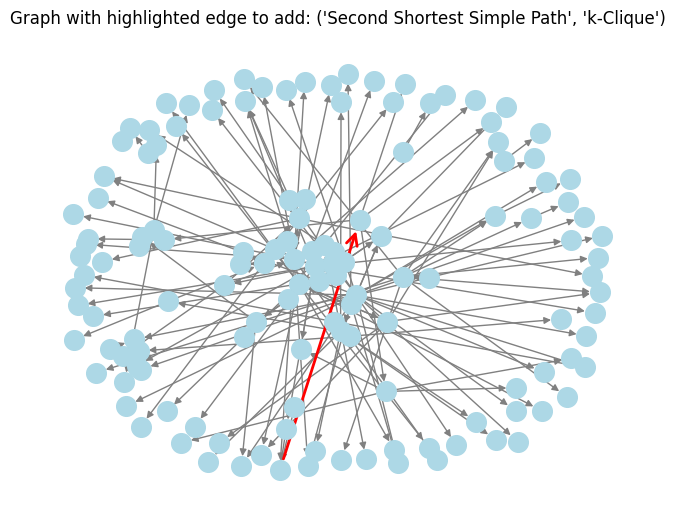

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_graph_with_edge_highlight(G, edge_to_add=None, layout='spring'):
    # Choose layout
    if layout == 'spring':
        # Spring layout with increased distance and iterations to reduce overlaps
        pos = nx.spring_layout(G, k=0.15, iterations=50)
    elif layout == 'kamada_kawai':
        # Kamada-Kawai layout for potentially better aesthetics
        pos = nx.kamada_kawai_layout(G)
    else:
        raise ValueError("Unsupported layout specified.")

    # Draw the original graph
    nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=200)
    
    if edge_to_add:
        # Highlight the edge to add in red
        nx.draw_networkx_edges(G, pos, edgelist=[edge_to_add], edge_color='red', width=2, arrowstyle='->', arrowsize=20)
        plt.title(f"Graph with highlighted edge to add: {edge_to_add}")
    else:
        plt.title("Original Graph")
    
    plt.axis('off')  # Turn off the axis
    plt.show()
plot_graph_with_edge_highlight(G, best_edge, layout='spring')  # Use 'kamada_kawai' as an alternative


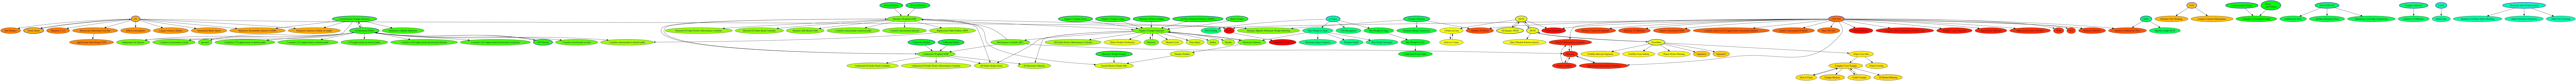

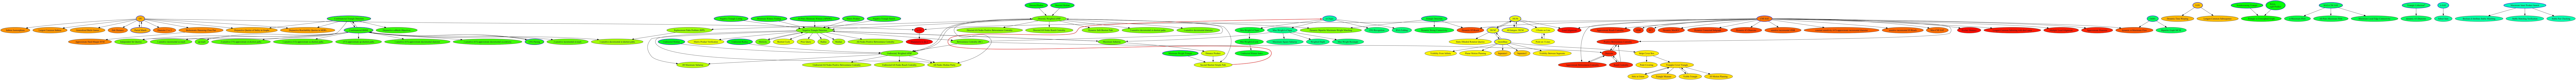

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz as pgv
from IPython.display import Image

def visualize_graph_enhancements(G, edge_to_add=None):
    # Calculate SCCs
    sccs = list(nx.strongly_connected_components(G))
    scc_colors = plt.get_cmap('hsv')(range(len(sccs)))
    
    # Identify source SCCs (SCCs with no incoming edges from nodes outside the SCC)
    source_scc_indices = []
    for i, scc in enumerate(sccs):
        is_source = True
        for node in scc:
            if any(pred not in scc for pred in G.predecessors(node)):
                is_source = False
                break
        if is_source:
            source_scc_indices.append(i)
    
    def plot_with_edge(graph, edge=None, filename="./graph.png"):
        A = nx.nx_agraph.to_agraph(graph)
        
        # Apply SCC color and source SCC border styles
        for i, scc in enumerate(sccs):
            color = "#{:02x}{:02x}{:02x}".format(*tuple(int(c * 255) for c in scc_colors[i][:3]))
            for node in scc:
                n = A.get_node(node)
                n.attr['style'] = 'filled'
                n.attr['fillcolor'] = color
                if i in source_scc_indices:
                    n.attr['penwidth'] = 2
                    n.attr['color'] = 'blue'
        
        # Add the new edge with a distinct style if specified
        if edge:
            A.add_edge(edge[0], edge[1], color="red", penwidth=2.0, constraint='false')
        
        A.layout(prog='dot')
        A.draw(filename)
        return Image(filename)

    # Visualize the original graph
    original_graph_img = plot_with_edge(G, filename="./original_graph.png")
    
    # Add the edge for visualization purposes if specified
    if edge_to_add:
        G.add_edge(*edge_to_add)
    
    # Visualize the graph with the new edge
    modified_graph_img = plot_with_edge(G, edge_to_add, filename="./modified_graph.png")
    
    # Remove the edge after visualization if it was added
    if edge_to_add:
        G.remove_edge(*edge_to_add)
    
    return original_graph_img, modified_graph_img

# Assuming G is your directed graph and best_edge is the edge you've identified for addition
original_graph_img, modified_graph_img = visualize_graph_enhancements(G, best_edge)

# Display the original graph
display(original_graph_img)

# Display the modified graph with the new edge
display(modified_graph_img)


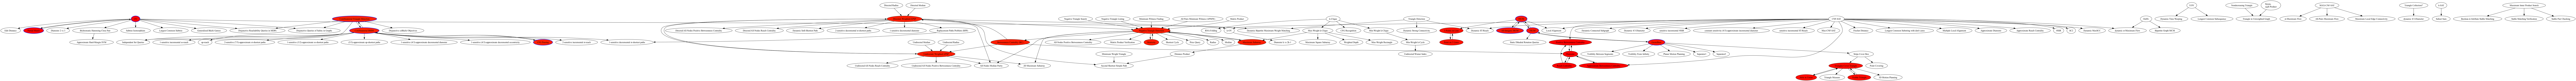

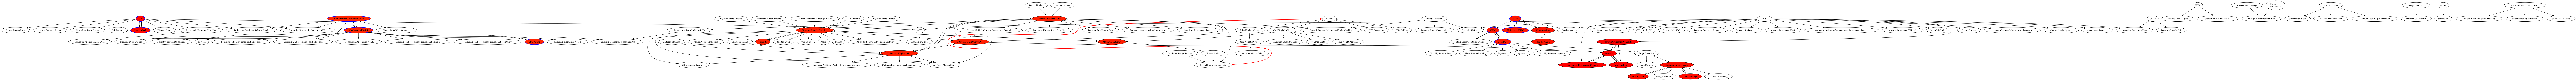

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz as pgv
from IPython.display import Image

def visualize_graph_focus_larger_sccs(G, edge_to_add=None):
    # Calculate SCCs and filter to those with more than one node
    sccs = [scc for scc in nx.strongly_connected_components(G) if len(scc) > 1]
    scc_colors = plt.get_cmap('hsv')(range(len(sccs)))
    
    # Identify source SCCs (with no incoming edges from nodes outside the SCC), focusing on larger SCCs
    source_scc_indices = []
    for i, scc in enumerate(sccs):
        is_source = True
        for node in scc:
            if any(pred not in scc for pred in G.predecessors(node)):
                is_source = False
                break
        if is_source:
            source_scc_indices.append(i)
    
    def plot_with_edge(graph, edge=None, filename="./graph.png"):
        A = nx.nx_agraph.to_agraph(graph)
        
        # Apply styles only to larger SCCs
        for i, scc in enumerate(sccs):
            color = "#{:02x}{:02x}{:02x}".format(*tuple(int(c * 255) for c in scc_colors[i][:3]))
            for node in scc:
                n = A.get_node(node)
                n.attr['style'] = 'filled'
                n.attr['fillcolor'] = color
                if i in source_scc_indices:
                    n.attr['penwidth'] = 2
                    n.attr['color'] = 'blue'
        
        # Add the new edge with a distinct style if specified
        if edge:
            A.add_edge(edge[0], edge[1], color="red", penwidth=2.0, constraint='false')
        
        A.layout(prog='dot')
        A.draw(filename)
        return Image(filename)

    # Visualize the original graph focusing on larger SCCs
    original_graph_img = plot_with_edge(G, filename="./original_graph_focus.png")
    
    # Add the edge for visualization purposes if specified
    if edge_to_add:
        G.add_edge(*edge_to_add)
    
    # Visualize the graph with the new edge, focusing on larger SCCs
    modified_graph_img = plot_with_edge(G, edge_to_add, filename="./modified_graph_focus.png")
    
    # Remove the edge after visualization if it was added
    if edge_to_add:
        G.remove_edge(*edge_to_add)
    
    return original_graph_img, modified_graph_img

# Assuming G is your directed graph and best_edge is the edge you've identified for addition
original_graph_img, modified_graph_img = visualize_graph_focus_larger_sccs(G, best_edge)

# Display the original graph focusing on larger SCCs
display(original_graph_img)

# Display the modified graph with the new edge, focusing on larger SCCs
display(modified_graph_img)

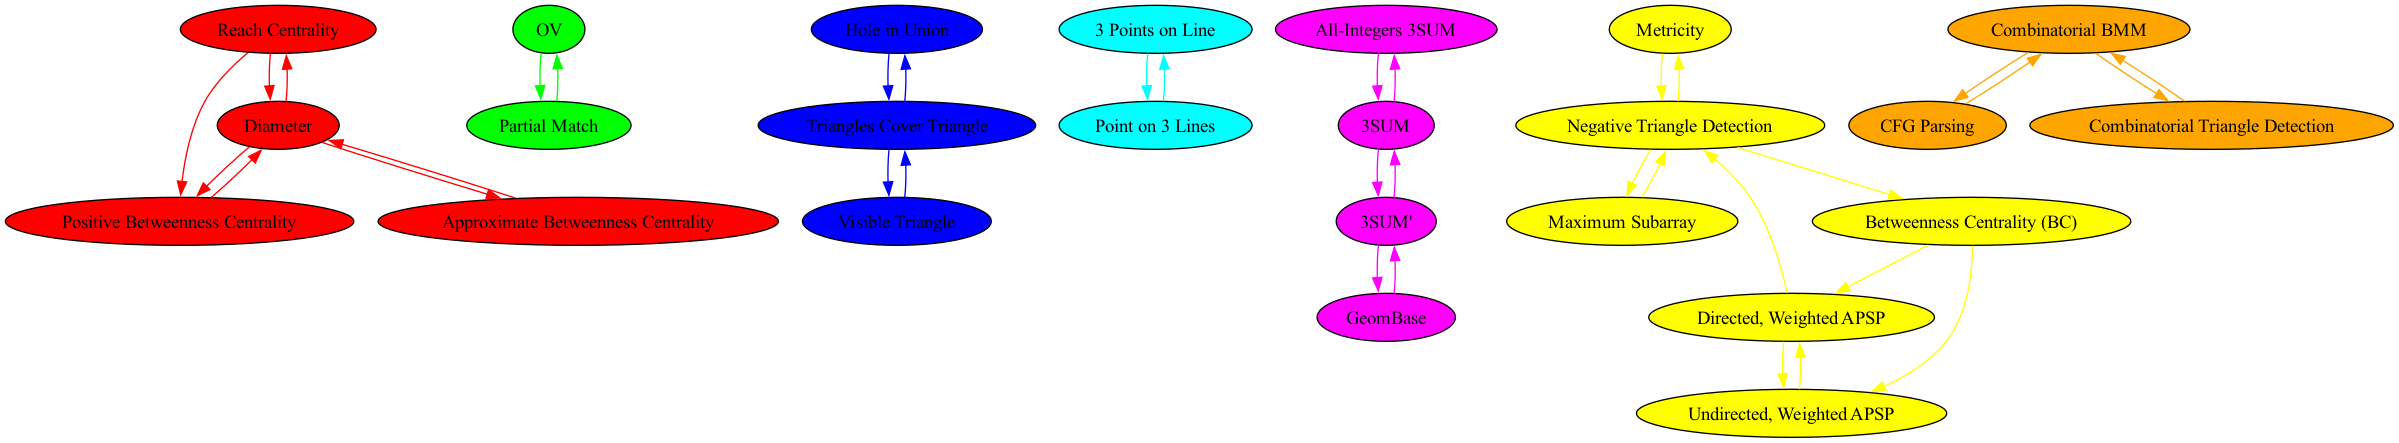

In [10]:
from IPython.display import Image

def visualize_all_larger_sccs_together(G):
    # Calculate SCCs with more than one node
    sccs = [scc for scc in nx.strongly_connected_components(G) if len(scc) > 1]
    
    # Initialize a new Graphviz graph
    A = pgv.AGraph(strict=True, directed=True)
    
    # Color map for differentiating SCCs
    colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown']
    
    for i, scc in enumerate(sccs):
        # Ensure color cycling if there are more SCCs than colors
        color = colors[i % len(colors)]
        
        # Add nodes and edges for the current SCC with a specific color
        for node in scc:
            A.add_node(node, style='filled', fillcolor=color)
            for neighbor in G[node]:
                if neighbor in scc:
                    A.add_edge(node, neighbor, color=color)
    
    # Layout and draw the graph
    A.layout(prog='dot')
    filename = "./larger_sccs_combined.png"
    A.draw(filename)
    
    return Image(filename)

# Assuming G is your directed graph
image = visualize_all_larger_sccs_together(G)
display(image)

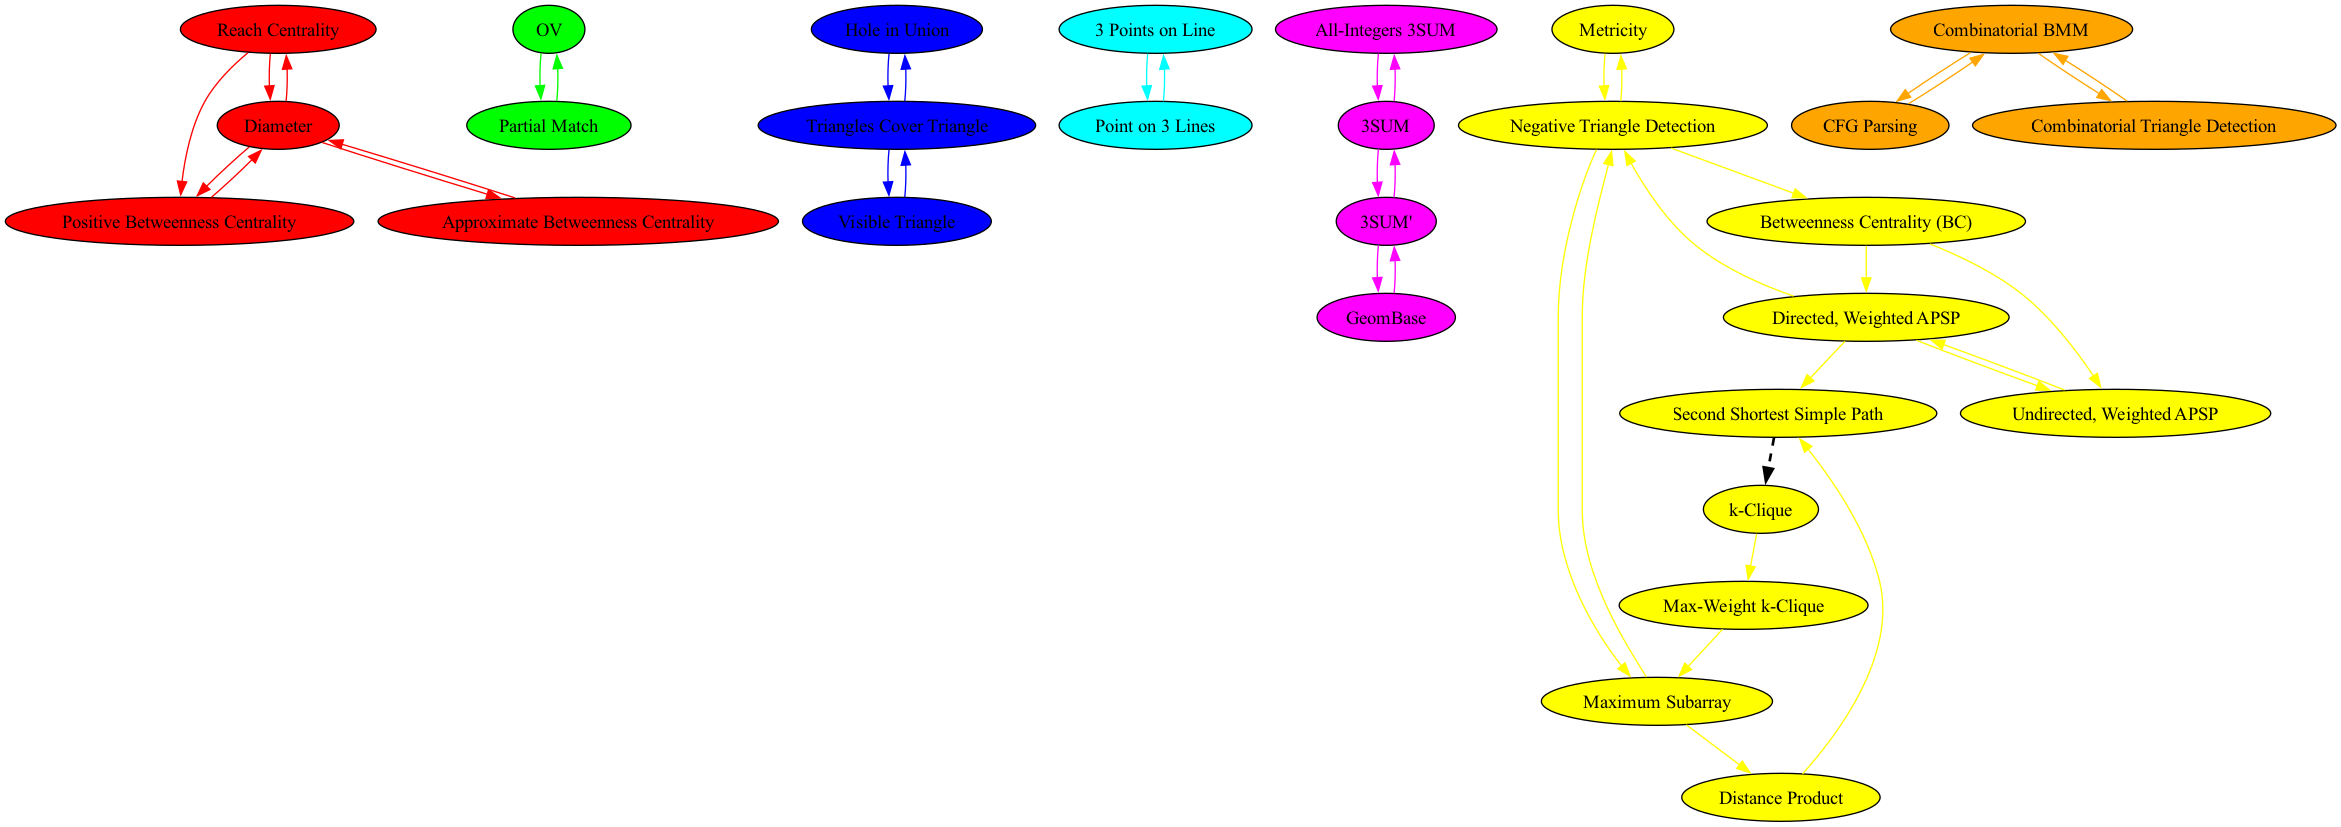

In [11]:
def visualize_all_larger_sccs_with_new_edge(G, edge_to_add):
    # Create a copy of the graph to avoid modifying the original
    G_modified = G.copy()
    
    # Add the specified new edge
    G_modified.add_edge(*edge_to_add)
    
    # Calculate SCCs with more than one node in the modified graph
    sccs = [scc for scc in nx.strongly_connected_components(G_modified) if len(scc) > 1]
    
    # Initialize a new Graphviz graph for the modified graph visualization
    A = pgv.AGraph(strict=True, directed=True)
    
    # Color map for differentiating SCCs
    colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'orange', 'purple', 'brown']
    
    for i, scc in enumerate(sccs):
        # Ensure color cycling if there are more SCCs than colors
        color = colors[i % len(colors)]
        
        # Add nodes and edges for the current SCC with a specific color
        for node in scc:
            A.add_node(node, style='filled', fillcolor=color)
            for neighbor in G_modified[node]:
                if neighbor in scc:
                    A.add_edge(node, neighbor, color=color)
    
    # Highlight the added edge with a distinct color and style
    A.add_edge(edge_to_add[0], edge_to_add[1], color="black", style="dashed", penwidth=2)

    # Layout and draw the graph
    A.layout(prog='dot')
    filename = "./larger_sccs_combined_with_new_edge.png"
    A.draw(filename)
    
    return Image(filename)

image_with_new_edge = visualize_all_larger_sccs_with_new_edge(G, best_edge)
display(image_with_new_edge)
